# 1x2 Maze
Our simplest maze model.

In [10]:
import numpy as np
from numpy.random import random_integers as rand
import pyquil
from pyquil.quil import Program
from pyquil.api import QVMConnection, get_devices, Job, CompilerConnection
from pyquil.gates import *
from scipy import linalg

qvm = QVMConnection()
devices = get_devices(as_dict = True)
acorn = devices['19Q-Acorn']
qvm = QVMConnection(acorn)

In [37]:
def createToffoli():
    identity = np.identity(8)
    identity[[6],[6]] = 0
    identity[[6],[7]] = 1
    identity[[7],[7]] = 0
    identity[[7],[6]] = 1
    return identity

def inverseToffoli():
    identity = np.identity(8)
    identity[[0],[0]] = 0
    identity[[0],[1]] = 1
    identity[[1],[1]] = 0
    identity[[1],[0]] = 1
    return identity

def controlSWAPdef():
    identity = np.identity(8)
    identity[[5],[5]] = 0
    identity[[5],[6]] = 1
    identity[[6],[6]] = 0
    identity[[6],[5]] = 1
    return identity

def controlHadamard():
    identity = np.identity(4)
    identity[[2],[2]] = 1/np.sqrt(2)
    identity[[2],[3]] = 1/np.sqrt(2)
    identity[[3],[2]] = 1/np.sqrt(2)
    identity[[3],[3]] = -1/np.sqrt(2)
    return identity

def quantumRandomWalk(program):
    qvm = QVMConnection()
    program.inst(('Toffoli', 5,3,0))
 
    program.inst(('invToffoli', 5,3,0))
   
    program.inst(('Toffoli', 6,4,1))
 
    program.inst(('invToffoli', 6,4,1))

    program.inst(('Toffoli', 7,6,5))
 #   print(qvm.wavefunction(program))
    program.inst(('Toffoli', 8,7,2))
    print("After Toffoli",qvm.wavefunction(program))
    program.inst(('controlSWAP', 3,4,8))
    print("After CSWAP",qvm.wavefunction(program))
    program.inst(('Toffoli', 8,7,2))
    
    program.inst(('Toffoli', 7,6,5))
    
    program.inst(('invToffoli', 6,4,1))
    
    program.inst(('Toffoli', 6,4,1))
    
    program.inst(('invToffoli', 5,3,0))
    
    program.inst(('Toffoli', 5,3,0))
    print("After Toffoli", qvm.wavefunction(program))
    program.inst(('controlH', 4,3))
    print("End",qvm.wavefunction(program))
    return(program)

def quantumRandomWalk_nQubits(program,n):
        i=0
        Gx = i
        Gy = n+i
        A = 2*n
        Psi_x = 2*n+1+i
        Psi_y = 3*n+1+i
        ancilla1 = 4*n+1+i
        ancilla2 = 5*n+1+i
        ancilla3 = 6*n+1+i
        ancilla4  = 7*n+1+i
        
        program.inst(('Toffoli', Gx, Psi_x, ancilla1 ))
        
        program.inst(('invToffoli', Gx, Psi_x, ancilla1))
        
        program.inst(('Toffoli', Gy, Psi_y, ancilla2))
        
        program.inst(('invToffoli', Gy, Psi_y, ancilla2))
        
        program.inst(('Toffoli', ancilla1, ancilla2, ancilla3))
        
        program.inst(('Toffoli', A, ancilla3, ancilla4))

        program.inst(('controlSWAP', ancilla4, Psi_x, Psi_y))
        
        program.inst(('Toffoli', A, ancilla3, ancilla4))
        
        program.inst(('Toffoli', ancilla1, ancilla2, ancilla3))
        
        program.inst(('invToffoli', Gy, Psi_y, ancilla2))
        
        program.inst(('Toffoli', Gy, Psi_y, ancilla2))
        
        program.inst(('invToffoli', i, Psi_x, ancilla1))
        
        program.inst(('Toffoli', i, Psi_x, ancilla1))
        
        program.inst(('controlH', Psi_x, Psi_y))
        
        return(program)
    
def quantumRandomWalk_badQubits(program):
    
    program.inst(('Toffoli', 10,5,17))
    program.inst(('invToffoli', 10,5,17))
    
    program.inst(('Toffoli', 1,16,12))
    program.inst(('invToffoli', 1,16,12))
    
    program.inst(('Toffoli', 17,12,7))
    program.inst(('Toffoli', 6,7,11))
    
    program.inst(('controlSWAP', 11,16,5))
    
    program.inst(('Toffoli', 6,7,11))
    program.inst(('Toffoli', 17,12,7))
    
    program.inst(('invToffoli', 1,16,12))
    program.inst(('Toffoli', 1,16,12))
    
    program.inst(('invToffoli', 10,5,17))
    program.inst(('Toffoli', 10,5,17))
    
    program.inst(('controlH', 5,16))
    
    return(program)

def quantumRandomWalk_badQubits_newLinks(program):
    
    program.inst(('Toffoli', 6,1,7))
    program.inst(('invToffoli', 6,1,7))
    
    program.inst(('Toffoli', 11,17,12))
    program.inst(('invToffoli', 11,17,12))
    
    program.inst(('Toffoli', 7,12,10))
    program.inst(('Toffoli', 16,10,5))
    
    program.inst(('controlSWAP', 5,17,1))
    
    program.inst(('Toffoli', 6,7,11))
    program.inst(('Toffoli', 17,12,7))
    
    program.inst(('invToffoli', 11,17,12))
    program.inst(('Toffoli', 11,17,12))
    
    program.inst(('invToffoli', 6,1,7))
    program.inst(('Toffoli', 6,1,7))
    
    program.inst(('controlH', 1,17))
    #program.inst(H(17))
    
    return(program)
    

def quantumRandomWalk_2QubitMaze(program):

    program.inst(('Toffoli', 0,3,5))
    program.inst(('invToffoli', 0,3,5))
    
    program.inst(('Toffoli', 1,4,6))
    program.inst(('invToffoli', 1,4,6))
    
    program.inst(('Toffoli', 5,6,7))
    program.inst(('Toffoli', 2,7,8))
    
    program.inst(('controlSWAP', 8,4,3))
    
    program.inst(('Toffoli', 2,7,8))
    program.inst(('Toffoli', 5,6,7))
    
    program.inst(('invToffoli', 1,4,6))
    program.inst(('Toffoli', 1,4,6))
    
    program.inst(('invToffoli', 0,3,5))
    program.inst(('Toffoli', 0,3,5))
    
    program.inst(('controlH', 3,4))
    
    return(program)

def defineGates(prog):
    controlH = controlHadamard()
    prog.defgate('controlH', controlH)

    controlSWAPgate = controlSWAPdef() 
    prog.defgate('controlSWAP', controlSWAPgate)

    invToffoli = inverseToffoli()
    prog.defgate('invToffoli', invToffoli)

    Toffoli =  createToffoli()
    prog.defgate('Toffoli', Toffoli)
    
    return(prog)


def initialise(prog):
    qubits = [6,11, 16]
    prog = Program(H(qubits[2]),
                             CNOT(qubits[2],qubits[0]),
                             H(qubits[1]),
                             CNOT(qubits[1],qubits[2]),
                             )
    return prog
    #results = qvm.run(prog,[0,1,2],1)
    #print(results)

In [38]:
def compile_INIT_gate(p):    
    #p.inst(("INIT",10, 16, 11))
    compiler = CompilerConnection(acorn)
    compiledProg = compiler.compile(p)
    qpuProg = Program()
    qpuProg.inst(compiledProg)
#    print(qvm.wavefunction(qpuProg))
    return qpuProg
compile_INIT_gate()

(0.5+0j)|000> + (0.5+0j)|011> + (0.5+0j)|101> + (0.5+0j)|110>


In [40]:
def compile_maze(step):
    prog = Program()
    prog = defineGates(prog)
    prog = initialise(prog)

    #print(qvm.wavefunction(prog))
    prog += H(17)
    for i in range(step):
    #Start at room 1 -> Look to get to room 0
        prog = quantumRandomWalk_badQubits_newLinks(prog)
#prog.measure(5,5)
#print(prog)
    compiler = CompilerConnection(acorn)
    compiledProg = compiler.compile(prog)
    qpuProg = Program()
    qpuProg.inst(compiledProg)
    #print(qvm.wavefunction(qpuProg))
    return qpuProg


In [41]:
def maze(step):

    prog = Program()
    prog = defineGates(prog)
    prog = initialise(prog)

    #print(qvm.wavefunction(prog))
    prog += H(17)
    for i in range(step):
    #Start at room 1 -> Look to get to room 0
        prog = quantumRandomWalk_badQubits(prog)
#prog.measure(5,5)
#print(prog)
    return prog

#output = qvm.run(prog, [5], trials = 10000)
#print(output)
#print(np.sum(output))


## Doing State Tomography

In [34]:
from grove.tomography.state_tomography import do_state_tomography
from grove.tomography.utils import notebook_mode
from pyquil.api import QPUConnection, get_devices, Job
import json
from mock import MagicMock
from __future__ import print_function
import matplotlib.pyplot as plt

qubits = [6,11,16]
qvm = QVMConnection()
NUM_SAMPLES=2000
# QPU
#online_devices = [d for d in get_devices() if d.is_online()]
#if online_devices:
#    d = online_devices[0]
#    qpu = QPUConnection(d.name)
#    print("Found online device {}, making QPUConnection".format(d.name))
#else:
    #qpu = QVMConnection()
    #print("Could not find online device, defaulting to QVM")

In [35]:
#Specify QPU
acorn = get_devices(as_dict=True)['19Q-Acorn']
qpu = QVMConnection(acorn)
#qpu = MagicMock(QPUConnection)
#qpu_job = MagicMock(Job)
#qpu.wait_for_job.return_value = qpu_job
#qpu_job.result.side_effect = json.load(open("qpu.json", 'r'))

## Step = 1

In [23]:
import os
def plot_state(step):

    #prog = maze(step)
    prog = compile_INIT_gate()
    print("Running state tomography on the QPU...")
    state_tomography_qpu, _, _ = do_state_tomography(prog, NUM_SAMPLES, qpu, qubits)
    print("State tomography completed.")
    print("Running state tomography on the QVM for reference...")
    state_tomography_qvm, _, _ = do_state_tomography(prog, NUM_SAMPLES, qvm, qubits)
    print("State tomography completed.")
    print(state_tomography_qvm.rho_est)
    state_fidelity = state_tomography_qpu.fidelity(state_tomography_qvm.rho_est)

    print(state_tomography_qpu.rho_est)
    qpu_plot = state_tomography_qpu.plot()
    qpu_plot.text(0.35, 0.9, r'$Fidelity={:1.1f}\%$'.format(state_fidelity*100), size=20)
    plt.savefig(os.path.join("state_tomo","state_tomography_qpu_%d.eps" %step))
    state_tomography_qvm.plot()
    plt.savefig(os.path.join("state_tomo","state_tomography_theory_%d.eps" %step))
    with open(os.path.join("state_tomo","probabilites.txt"),"ab") as f:
        np.savetxt(f,[state_tomography_qpu.rho_est[0,0].real, state_tomography_qvm.rho_est[0,0].real])

  0%|          | 0/8 [00:00<?, ?it/s]

(-0.3535533906+0.3535533906j)|000> + (-0.3535533906+0.3535533906j)|011> + (-0.3535533906+0.3535533906j)|101> + (-0.3535533906+0.3535533906j)|110>
Running state tomography on the QPU...


 88%|████████▊ | 7/8 [00:09<00:01,  1.39s/it]/Users/lisatse/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
  0%|          | 0/8 [00:00<?, ?it/s]

State tomography completed.
Running state tomography on the QVM for reference...


100%|██████████| 64/64 [00:41<00:00,  1.53it/s]


State tomography completed.
Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 2.47208389e-01+0.00000000e+00j  1.98675730e-03-1.01012559e-03j
   1.74147264e-03+3.46284764e-05j  2.49349054e-01-7.61727778e-04j
  -7.70839976e-04-1.12386698e-03j  2.49247178e-01+4.71483159e-03j
   2.48615577e-01-2.06184399e-03j  7.78446020e-04+5.55644896e-03j]
 [ 1.98675730e-03+1.01012559e-03j -7.98434839e-07+0.00000000e+00j
  -6.19718661e-07+6.42157795e-04j -1.45087706e-04+5.88181856e-04j
   2.58307330e-07+4.69948161e-03j -2.41247746e-04+2.31872617e-03j
   3.82241798e-03-3.19368713e-03j  2.58616234e-07+5.12058375e-03j]
 [ 1.74147264e-03-3.46284764e-05j -6.19718661e-07-6.42157795e-04j
  -7.42242430e-07+0.00000000e+00j -3.89453867e-04+3.87763745e-04j
   5.99237731e-08+6.16829837e-03j -1.40236268e-02-3.81509973e-03j
   1.75265398e-03+1.69871920e-03j  6.70091281e-08-1.84646280e-03j]
 [ 2.49349054e-01+7.61727778e-04j -1.45087706e-04-5.88181856e-04j
  -3.8945

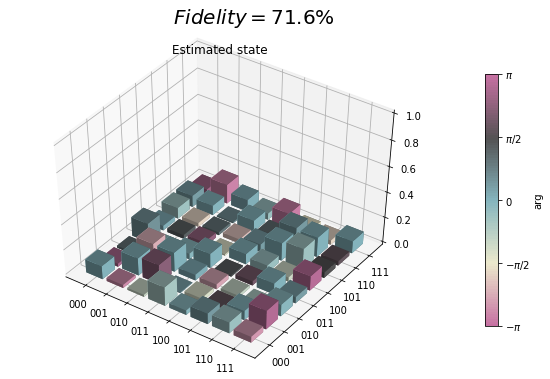

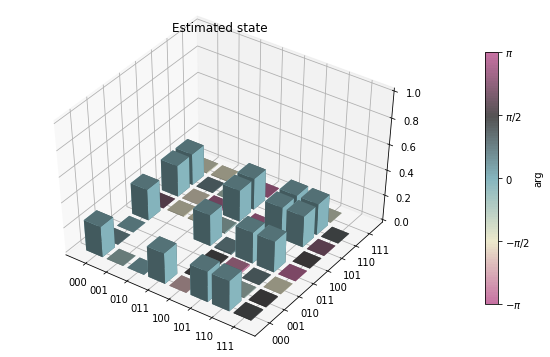

In [36]:
plot_state(1)

## Step = 2

DEFGATE INIT:
    1.0, 0, 0, 0, 0, 0, 0, 0
    0, 1.0, 0, 0, 0, 0, 0, 0
    0, 0, 0, 1.0, 0, 0, 0, 0
    0, 0, 1.0, 0, 0, 0, 0, 0
    0, 0, 0, 0, 0, 1.0, 0, 0
    0, 0, 0, 0, 1.0, 0, 0, 0
    0, 0, 0, 0, 0, 0, 1.0, 0
    0, 0, 0, 0, 0, 0, 0, 1.0

H 10
H 1
INIT 10 16 11



  0%|          | 0/2 [00:00<?, ?it/s]

Running state tomography on the QPU...


  0%|          | 0/2 [00:00<?, ?it/s]

job xBSQZVpoQlbXuuMT is currently running


 50%|█████     | 1/2 [00:01<00:01,  1.78s/it]

job fjRpPSuzabvUpFYp is currently running


  0%|          | 0/4 [00:00<?, ?it/s]

job whklVZQdYMLHOjyJ is currently running


 25%|██▌       | 1/4 [00:01<00:04,  1.45s/it]

job yjyTqOkJyEfOvvUM is currently running


 50%|█████     | 2/4 [00:02<00:02,  1.39s/it]

job rHpeOmmYocBaVbhF is currently running


 75%|███████▌  | 3/4 [00:04<00:01,  1.42s/it]

job eOTytAFLXPOZWbix is currently running


  0%|          | 0/2 [00:00<?, ?it/s]

State tomography completed.
Running state tomography on the QVM for reference...


  0%|          | 0/2 [00:00<?, ?it/s]

job TtRVKcmXhalfmSkg is currently running


 50%|█████     | 1/2 [00:03<00:03,  3.99s/it]

job XjcgYEdoPKVwNDIg is currently running


 75%|███████▌  | 3/4 [00:02<00:00,  1.44it/s]

job trlhdiKGyPPxTBiq is currently running


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


State tomography completed.
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.04249323+0.        j  0.0051545 +0.00840969j]
 [ 0.0051545 -0.00840969j -0.04249283+0.        j]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.72838681+0.        j -0.23460203-0.16965244j]
 [-0.23460203+0.16965244j  0.27161407+0.        j]]


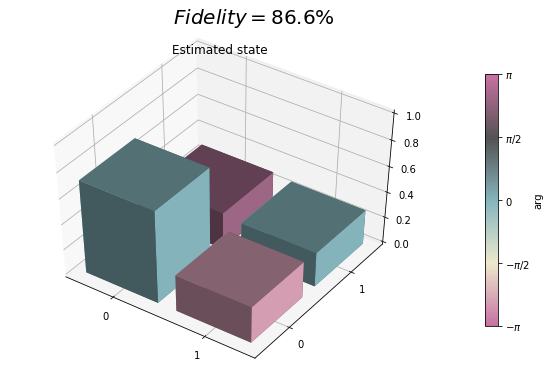

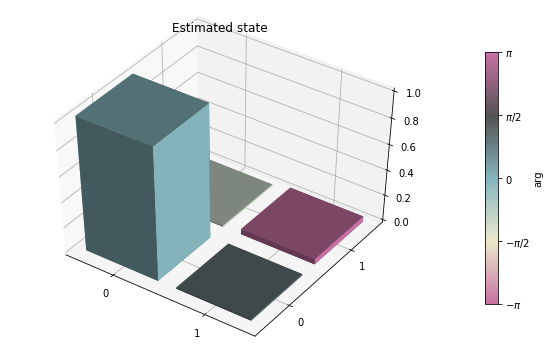

In [18]:
plot_state(2)

## Step = 3

 50%|█████     | 1/2 [00:00<00:00,  5.10it/s]

Running state tomography on the QPU...


  0%|          | 0/2 [00:00<?, ?it/s]

State tomography completed.
Running state tomography on the QVM for reference...


100%|██████████| 4/4 [00:02<00:00,  1.84it/s]


State tomography completed.
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 9.08250295e-01+0.        j -5.00000841e-04+0.00599994j]
 [-5.00000841e-04-0.00599994j  9.17500507e-02+0.        j]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.91524986+0.        j 0.00800025-0.00150007j]
 [0.00800025+0.00150007j 0.08474975+0.        j]]


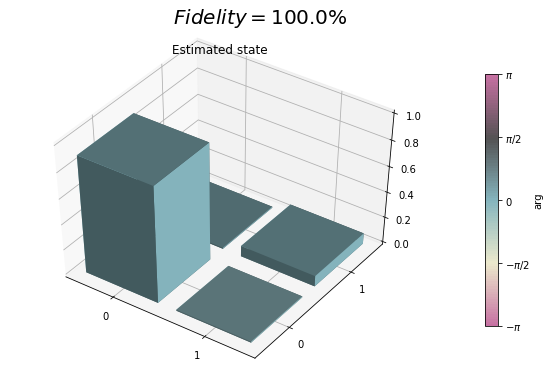

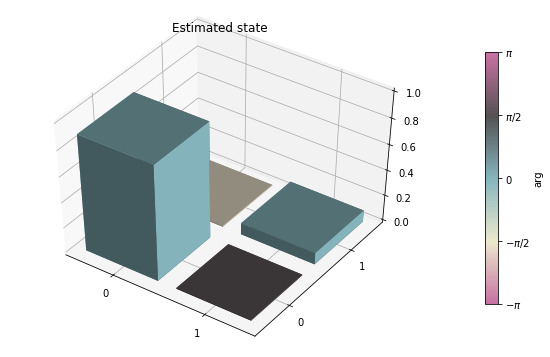

In [22]:
plot_state(3)

## Step 4

  0%|          | 0/2 [00:00<?, ?it/s]

Running state tomography on the QPU...


  0%|          | 0/2 [00:00<?, ?it/s]

State tomography completed.
Running state tomography on the QVM for reference...


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


State tomography completed.
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.88049977+0.        j -0.02099982+0.00400015j]
 [-0.02099982-0.00400015j  0.11950002+0.        j]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.87925005+0.        j 0.00550023+0.02199999j]
 [0.00550023-0.02199999j 0.12074998+0.        j]]


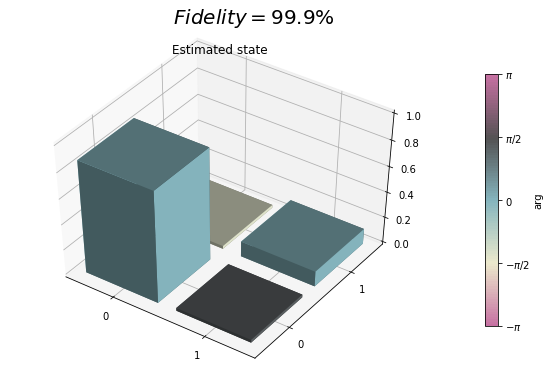

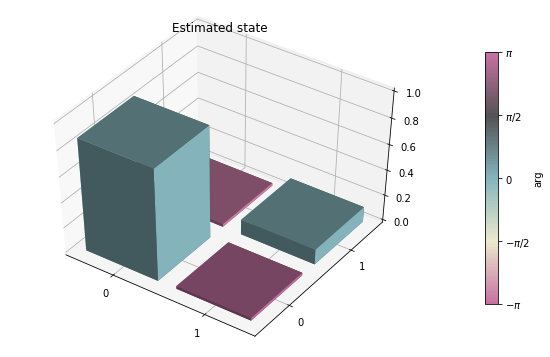

In [23]:
plot_state(4)

## Step 5

  0%|          | 0/2 [00:00<?, ?it/s]

Running state tomography on the QPU...


 50%|█████     | 2/4 [00:00<00:00,  2.17it/s]

job uzQRhilJsjXhmJng is currently running


 50%|█████     | 1/2 [00:00<00:00,  5.42it/s]

State tomography completed.
Running state tomography on the QVM for reference...


100%|██████████| 4/4 [00:02<00:00,  1.81it/s]


State tomography completed.
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.98925061+0.        j 0.01049993-0.00300027j]
 [0.01049993+0.00300027j 0.01074932+0.        j]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.99024762+0.        j -0.01749945-0.01250025j]
 [-0.01749945+0.01250025j  0.00975102+0.        j]]


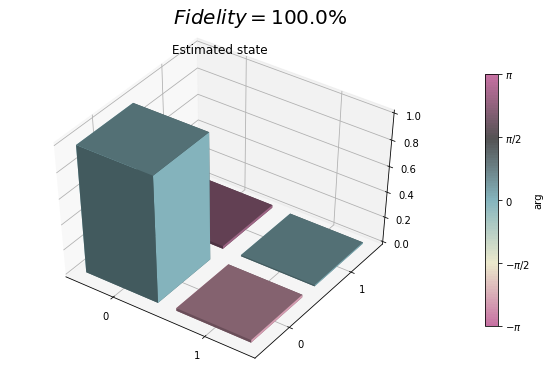

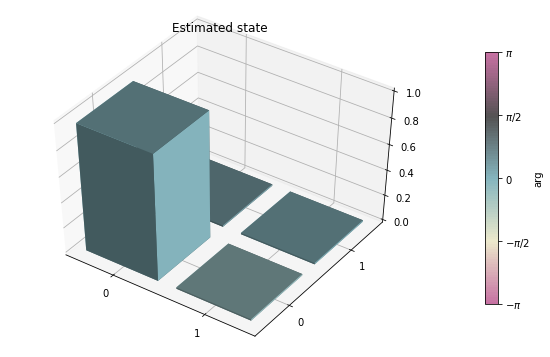

In [36]:
plot_state(5)

## Step 10

 50%|█████     | 1/2 [00:00<00:00,  5.30it/s]

Running state tomography on the QPU...


  0%|          | 0/2 [00:00<?, ?it/s]

State tomography completed.
Running state tomography on the QVM for reference...


100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


State tomography completed.
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.96875009+0.        j 0.        +0.00799991j]
 [0.        -0.00799991j 0.03124991+0.        j]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.96100003+0.        j 0.00650006-0.01500009j]
 [0.00650006+0.01500009j 0.03899997+0.        j]]


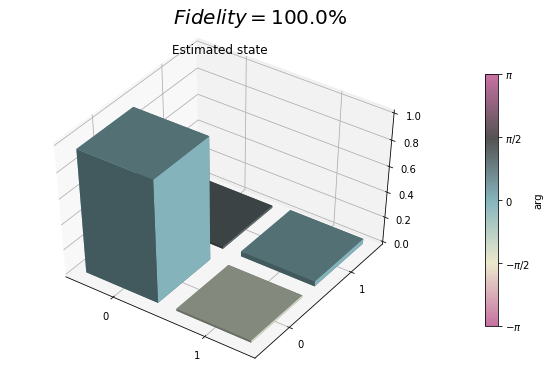

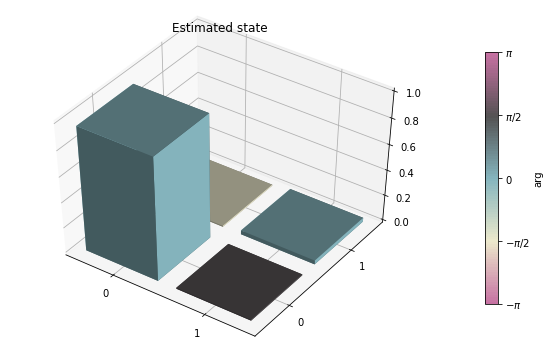

In [37]:
plot_state(10)

## Additional analysis (Do not run during lab!)
Now we want to plot the result of the quantum walk with respect to time for both the QVM and QPU

In [65]:
probabilities = np.loadtxt(os.path.join("state_tomo","probabilites.txt"))
probabilities

array([0.87375   , 0.8694999 , 0.92974951, 0.9362505 ])

Text(0,0.5,'Probability of 0 state')

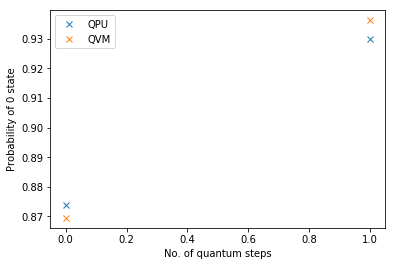

In [81]:
y_qpu = [x for ind,x in enumerate(probabilities) if ind%2==0]
y_qvm = [x for ind,x in enumerate(probabilities) if ind%2==1]
assert len(y_qpu) == len(y_qvm)
x = range(len(y_qvm))
plt.plot(x,y_qpu,'x',label="QPU")
plt.plot(x,y_qvm,'x', label="QVM")
plt.legend()
plt.xlabel("No. of quantum steps")
plt.ylabel("Probability of 0 state")